In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

#### Simulation 1

In [4]:
simulation_results = pd.read_csv("Location Based Shopping Data with Incomplete Inventory(10000 days, 1-50 cpd).csv")
simulation_results

,day_no,total_customers,store_customers,store_name,revenue_actual,revenue_potential,pl_perc,num_disappointed,disappointment%
0,1,34,13,ajijo,12.98,20.97,-61.56,13,100.00
1,1,34,21,bharat,899.03,899.03,0.00,0,0.00
2,2,8,2,ajijo,0.00,0.00,0.00,2,100.00
3,2,8,6,bharat,303.00,303.00,0.00,0,0.00
4,3,19,8,ajijo,0.00,0.00,0.00,8,100.00
...,...,...,...,...,...,...,...,...,...
19995,9998,38,27,bharat,1128.71,1128.71,0.00,0,0.00
19996,9999,40,15,ajijo,64.58,77.23,-19.59,14,93.33
19997,9999,40,25,bharat,1143.31,1143.31,0.00,0,0.00
19998,10000,9,5,ajijo,4.50,4.50,0.00,4,80.00


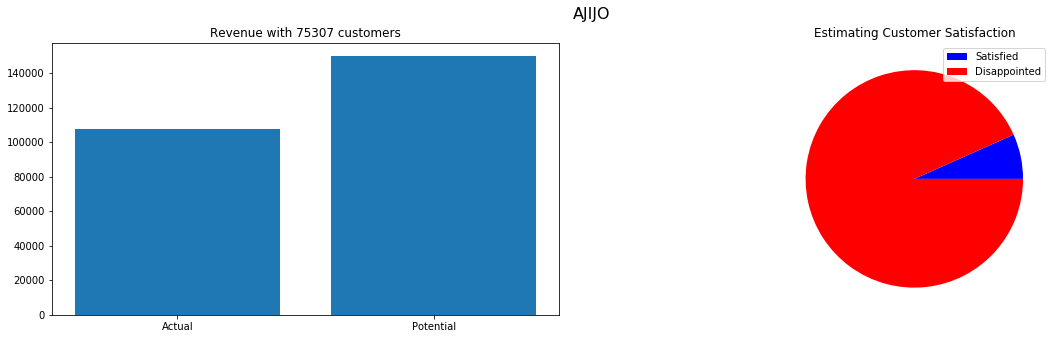

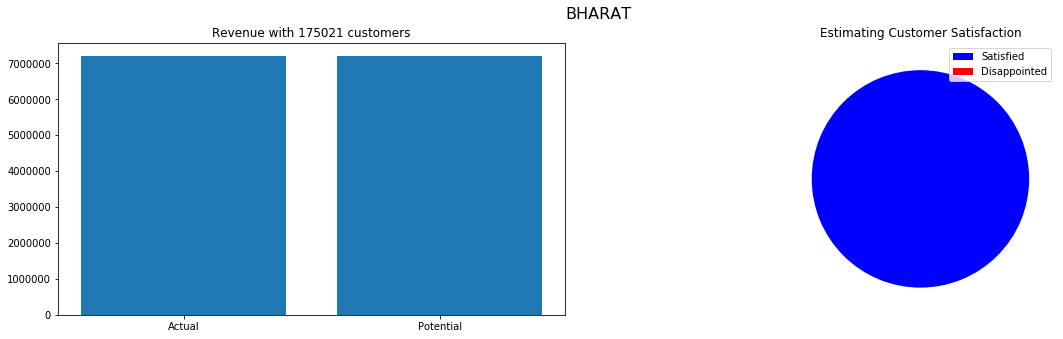

In [5]:
# Ajijo Dashboard and Bharat Dashboard
for store_name in simulation_results.store_name.unique():
    
    a_data = simulation_results[simulation_results['store_name'] == store_name]

    actual_revenue_total = a_data.revenue_actual.sum()
    potential_revenue_total = a_data.revenue_potential.sum()

    num_visited = a_data.store_customers.sum()
    a_disappointed = a_data.num_disappointed.sum()
    a_not_disappointed = num_visited - a_disappointed

    fig, ax = plt.subplots(1,2, figsize=(20,5))

    fig.suptitle(store_name.upper(), fontsize=16)
    ax[0].bar(['Actual', 'Potential'], [actual_revenue_total, potential_revenue_total])
    ax[0].set_title("Revenue with {} customers".format(num_visited))

    ax[1].pie([a_not_disappointed, a_disappointed], colors=['blue', 'red'])
    ax[1].set_title("Estimating Customer Satisfaction")
    ax[1].legend(['Satisfied', 'Disappointed'], loc='best')

    plt.show()

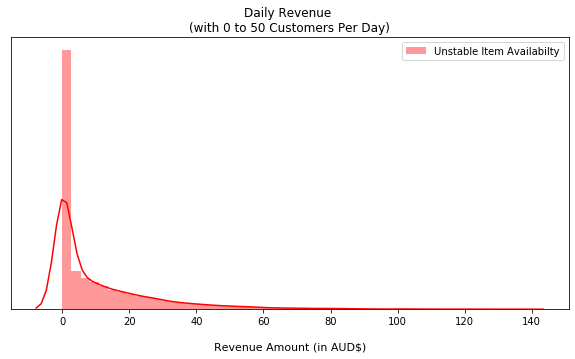

In [6]:
full_inventory = simulation_results[simulation_results['store_name'] == 'bharat']
unstable_inventory = simulation_results[simulation_results['store_name'] == 'ajijo']

plt.figure(figsize=(10,5))
# sns.distplot(full_inventory.revenue_actual, color='blue', label='Full Inventory')
sns.distplot(unstable_inventory.revenue_actual, color='red', label='Unstable Item Availabilty')
plt.legend()
plt.yticks([])
plt.title("Daily Revenue \n(with 0 to 50 Customers Per Day)")
plt.xlabel("\nRevenue Amount (in AUD$)", fontsize=11)
plt.savefig("Inventory Opportunity")

plt.show()

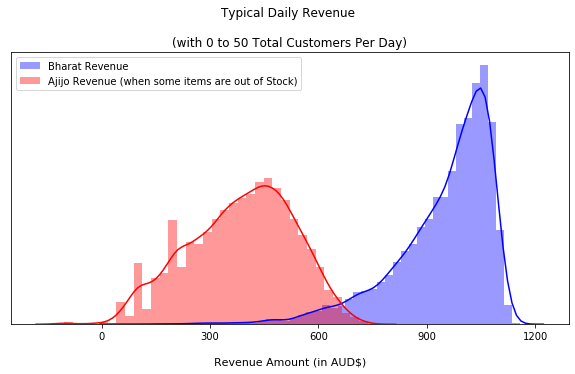

In [7]:
full_inventory = simulation_results[simulation_results['store_name'] == 'bharat']
unstable_inventory = simulation_results[simulation_results['store_name'] == 'ajijo']

plt.figure(figsize=(10,5))
sns.distplot(np.log(full_inventory[full_inventory.revenue_actual > 0].revenue_actual), color='blue', label='Bharat Revenue')
sns.distplot(np.log(unstable_inventory[unstable_inventory.revenue_actual > 0].revenue_actual), color='red', label='Ajijo Revenue (when some items are out of Stock)')
plt.legend()
plt.yticks([])
plt.xticks(ticks=[0,2,4,6,8],labels=[0,300,600,900,1200])
plt.title("Typical Daily Revenue \n\n(with 0 to 50 Total Customers Per Day)")
plt.xlabel("\nRevenue Amount (in AUD$)", fontsize=11)
plt.savefig("Daily Revenue with Location Based Sales (Without System)")

plt.show()

#### Simulation 2

In [8]:
simulation_results = pd.read_csv("Location Based Shopping Data with Full Inventory (10000 days, 1-50 cpd).csv")
simulation_results

,day_no,total_customers,store_customers,store_name,revenue_actual,revenue_potential,pl_perc,num_disappointed,disappointment%
0,1,34,13,ajijo,15.90,15.90,0.0,11,84.62
1,1,34,21,bharat,899.03,899.03,0.0,0,0.00
2,2,8,2,ajijo,0.00,0.00,0.0,2,100.00
3,2,8,6,bharat,303.00,303.00,0.0,0,0.00
4,3,19,8,ajijo,0.00,0.00,0.0,8,100.00
...,...,...,...,...,...,...,...,...,...
19995,9998,38,27,bharat,1128.71,1128.71,0.0,0,0.00
19996,9999,40,15,ajijo,118.70,118.70,0.0,11,73.33
19997,9999,40,25,bharat,1143.31,1143.31,0.0,0,0.00
19998,10000,9,5,ajijo,1.50,1.50,0.0,4,80.00


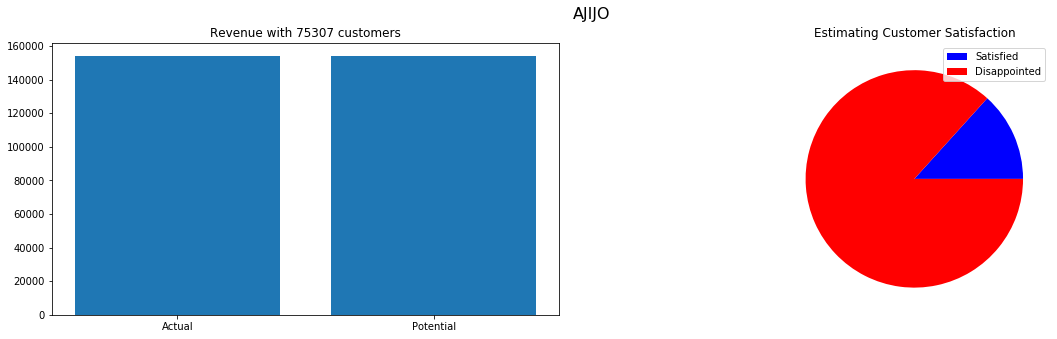

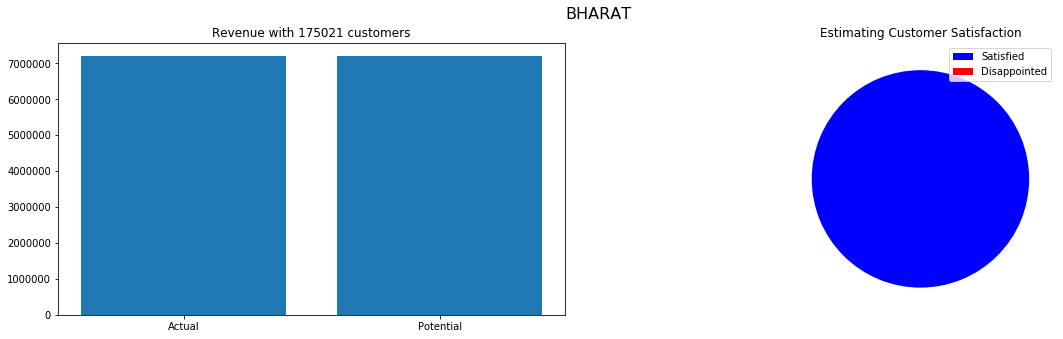

In [9]:
# Ajijo Dashboard and Bharat Dashboard
for store_name in simulation_results.store_name.unique():
    
    a_data = simulation_results[simulation_results['store_name'] == store_name]

    actual_revenue_total = a_data.revenue_actual.sum()
    potential_revenue_total = a_data.revenue_potential.sum()

    num_visited = a_data.store_customers.sum()
    a_disappointed = a_data.num_disappointed.sum()
    a_not_disappointed = num_visited - a_disappointed

    fig, ax = plt.subplots(1,2, figsize=(20,5))

    fig.suptitle(store_name.upper(), fontsize=16)
    ax[0].bar(['Actual', 'Potential'], [actual_revenue_total, potential_revenue_total])
    ax[0].set_title("Revenue with {} customers".format(num_visited))

    ax[1].pie([a_not_disappointed, a_disappointed], colors=['blue', 'red'])
    ax[1].set_title("Estimating Customer Satisfaction")
    ax[1].legend(['Satisfied', 'Disappointed'], loc='best')

    plt.show()

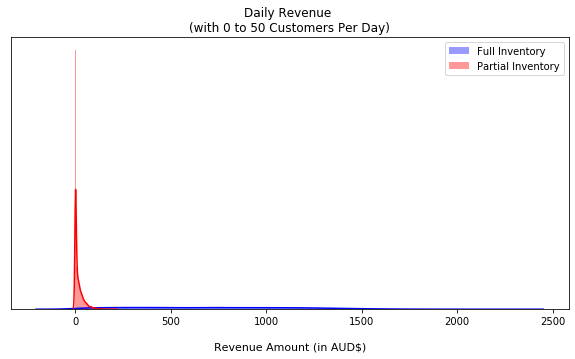

In [10]:
full_inventory = simulation_results[simulation_results['store_name'] == 'bharat']
unstable_inventory = simulation_results[simulation_results['store_name'] == 'ajijo']

plt.figure(figsize=(10,5))
sns.distplot(full_inventory.revenue_actual, color='blue', label='Full Inventory')
sns.distplot(unstable_inventory.revenue_actual, color='red', label='Partial Inventory')
plt.legend()
plt.yticks([])
plt.title("Daily Revenue \n(with 0 to 50 Customers Per Day)")
plt.xlabel("\nRevenue Amount (in AUD$)", fontsize=11)
plt.savefig("Inventory Opportunity")

plt.show()

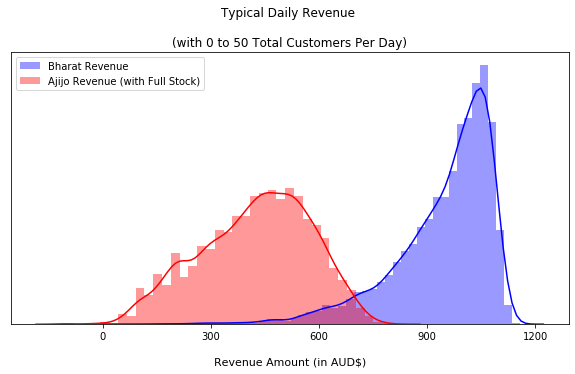

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(full_inventory[full_inventory.revenue_actual > 0].revenue_actual), color='blue', label='Bharat Revenue')
sns.distplot(np.log(unstable_inventory[unstable_inventory.revenue_actual > 0].revenue_actual), color='red', label='Ajijo Revenue (with Full Stock)')
plt.legend()
plt.yticks([])
plt.xticks(ticks=[0,2,4,6,8],labels=[0,300,600,900,1200])
plt.title("Typical Daily Revenue \n\n(with 0 to 50 Total Customers Per Day)")
plt.xlabel("\nRevenue Amount (in AUD$)", fontsize=11)
plt.savefig("Daily Revenue with Location Based Sales (Without System)")

plt.show()

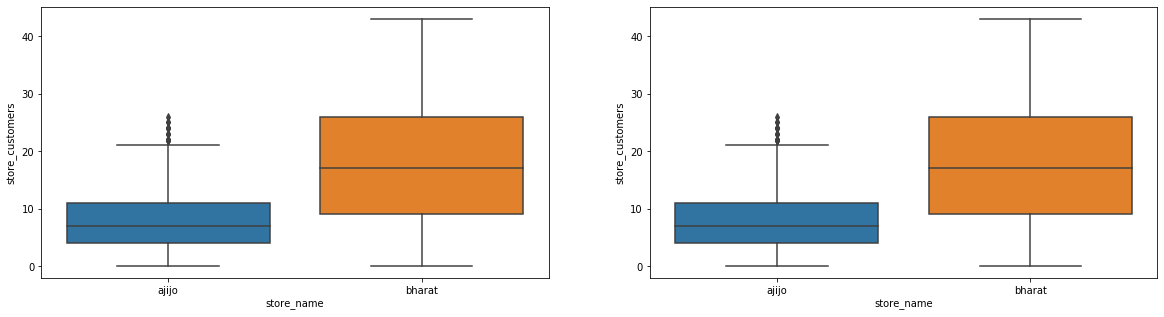

In [13]:
sim1 = pd.read_csv("Location Based Shopping Data with Incomplete Inventory(10000 days, 1-50 cpd).csv")
sim2 = pd.read_csv("Location Based Shopping Data with Full Inventory (10000 days, 1-50 cpd).csv")

fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(y='store_customers', x='store_name', data=sim1, ax=ax[0])
sns.boxplot(y='store_customers', x='store_name', data=sim2, ax=ax[1])
plt.show()

In [ ]:
# Comparison Points

# 1.
# Bharat - More Customers
# Ajijo - Fewer Customers

# 2.
# Bharat - More Product Choices
# Ajijo - Fewer Product Choices

# 3. 
# Bharat - Full Stock Always
# Ajijo - Limited Stock

In [1]:
def plot_revenue_distribution(sim_data, ax):
    
    full_inventory = sim_data[sim_data['store_name'] == 'bharat']
    unstable_inventory = sim_data[sim_data['store_name'] == 'ajijo']

    sns.distplot(np.log(full_inventory[full_inventory.revenue_actual > 0].revenue_actual), color='blue', label='Bharat Revenue', ax=ax)
    sns.distplot(np.log(unstable_inventory[unstable_inventory.revenue_actual > 0].revenue_actual), color='red', label='Ajijo Revenue (with Full Stock)', ax=ax)
    
    ax.legend()
    ax.set_yticks([])
    ax.set_title("Typical Daily Revenue (Log Transformed) \n\n(with 0 to 50 Total Customers Per Day)")
    ax.set_xlabel("\nRevenue Amount (in AUD$)", fontsize=11)

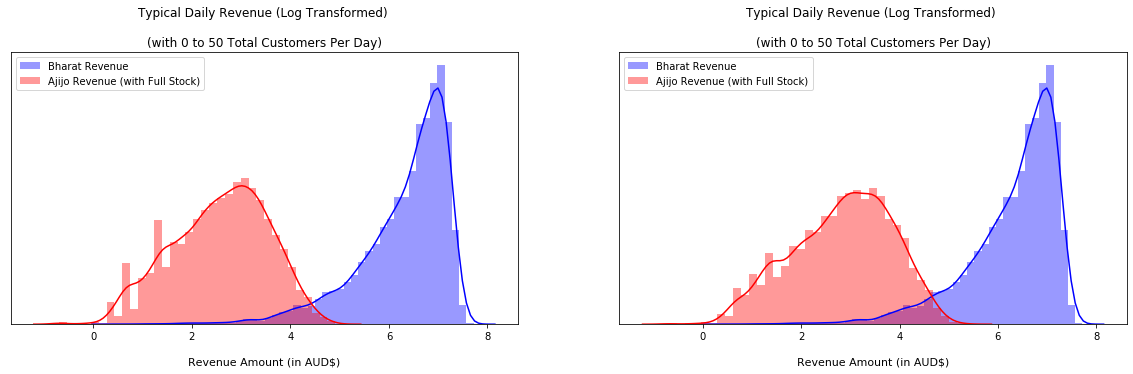

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot_revenue_distribution(sim1, ax[0])
plot_revenue_distribution(sim2, ax[1])

In [29]:
def compare_revenue(a, b, ax):
    
    full_inventory = a[a['store_name'] == 'bharat']
    unstable_inventory = a[a['store_name'] == 'ajijo']
    stable_inventory = b[b['store_name'] == 'ajijo']

    sns.distplot(np.log(full_inventory[full_inventory.revenue_actual > 0].revenue_actual), color='blue', label='Bharat Revenue', ax=ax)
    sns.distplot(np.log(unstable_inventory[unstable_inventory.revenue_actual > 0].revenue_actual), color='red', label='Ajijo Revenue (with Unstable Stock)', ax=ax)
    sns.distplot(np.log(stable_inventory[stable_inventory.revenue_actual > 0].revenue_actual), color='green', label='Ajijo Revenue (with Stable Stock)', ax=ax)

    ax.legend()
    ax.set_yticks([])
    ax.set_title("Typical Daily Revenue (Log Transformed) \n(with 0 to 50 Total Customers Per Day)")
    ax.set_xlabel("\nRevenue Amount (in AUD$)", fontsize=11)

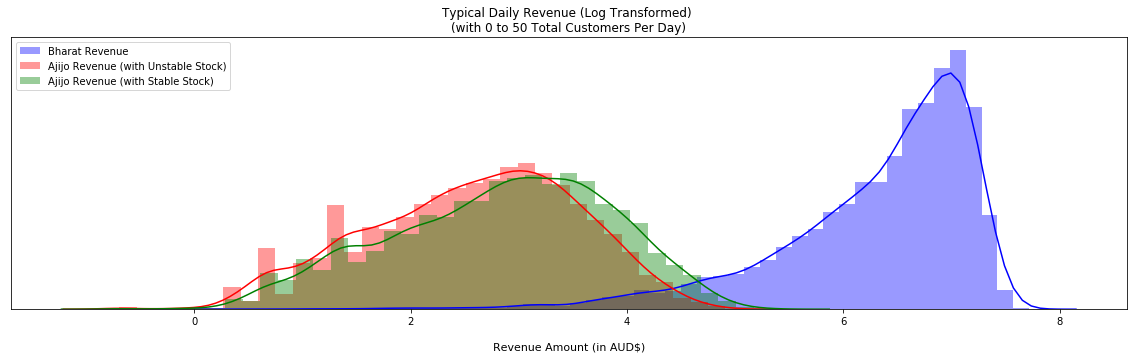

In [30]:
fig, ax = plt.subplots(figsize=(20,5))

compare_revenue(sim1, sim2, ax)
plt.savefig("No Substitute Goods Assumption")